<a href="https://colab.research.google.com/github/CodeHunterOfficial/ABC_DataMining/blob/main/DL/5_%D0%A1%D0%B2%D0%B5%D1%80%D1%82%D0%BE%D1%87%D0%BD%D1%8B%D0%B5_%D0%BD%D0%B5%D0%B9%D1%80%D0%BE%D0%BD%D0%BD%D1%8B%D0%B5_%D1%81%D0%B5%D1%82%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1. Свёртка: основы и методы применения

Растровое изображение представляет собой матрицу пикселей, каждый из которых описывается числовым значением, определяющим его яркость. Диапазон значений яркости может варьироваться: например, от 0 до 255 или от 0 до 1. Рассмотрим процесс применения операции свёртки к изображению и последующего использования методов пулинга.

#### Исходные данные
Имеется изображение (обозначено зелёным) и ядро свёртки (обозначено голубым), которое необходимо применить к изображению[1].



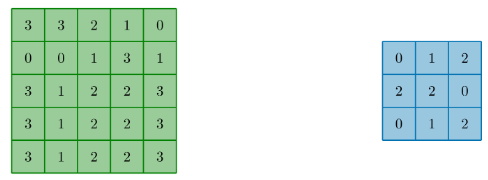



#### а) Свёртка без сдвигов и дополнений с последующим применением max pooling и average pooling
Операция свёртки заключается в наложении ядра свёртки на исходное изображение, поэлементном умножении значений и их суммировании. После этого ядро смещается по изображению, и операция повторяется.




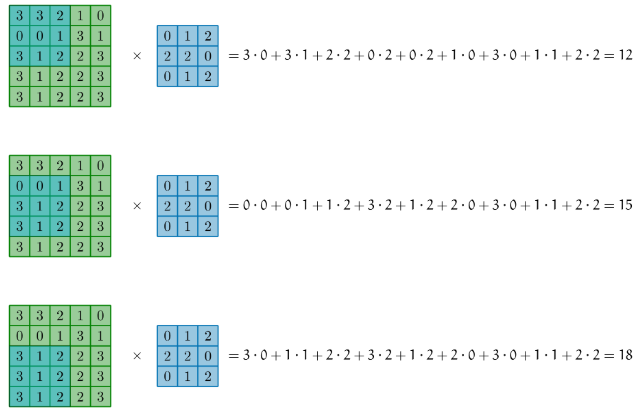

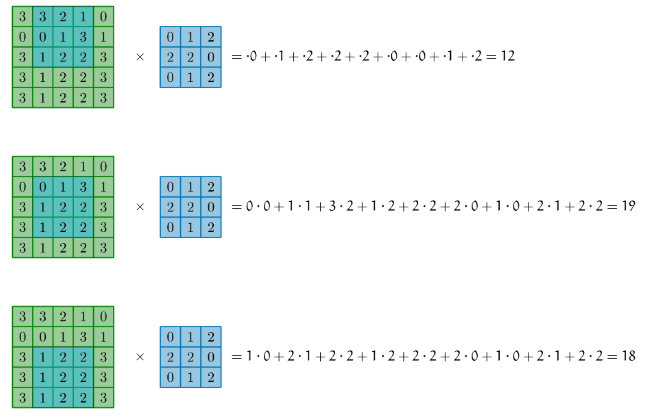

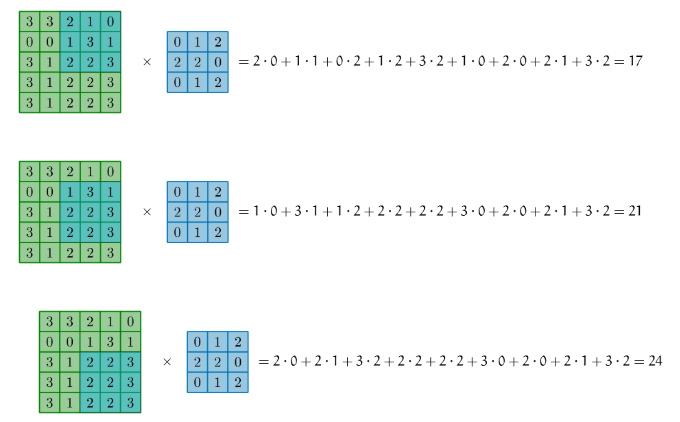

Результирующее изображение после применения свёртки.


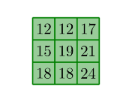


Исходное изображение имело размерность 4×4. После свёртки его размерность уменьшилась до 3×3. Для контроля изменения размерности изображения используется метод дополнения нулями (zero padding), который позволяет сохранить исходные размеры изображения.

Для уменьшения размерности изображения применяются методы пулинга. Изображение разбивается на блоки размером k×k, и для каждого блока вычисляется либо максимальное значение (max pooling), либо среднее значение (average pooling). Например:
- Max pooling: max(12, 12, 17, 15, 19, 21, 18, 18, 24) = 24
- Average pooling: (12 + 12 + 17 + 15 + 19 + 21 + 18 + 18 + 24) / 9 ≈ 17.3

#### б) Свёртка с параметром сдвига (stride) равным 2
При использовании параметра сдвига (stride) ядро свёртки применяется не к каждому пикселю, а через определённый интервал. На рисунке ниже выделены клетки, к которым применяется ядро свёртки.

  


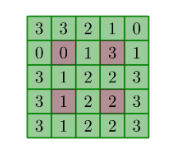

Иллюстрация применения свёртки с stride = 2.




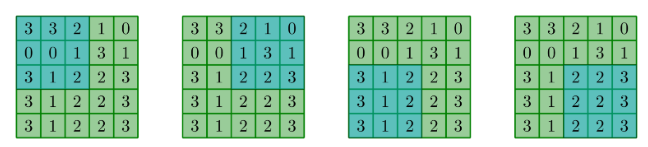

Результирующее изображение после свёртки с stride = 2.


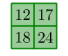


#### в) Свёртка с дополнением нулями (zero padding) и параметром сдвига (stride) равным 1
Для сохранения размерности изображения применяется метод дополнения нулями. Ядро свёртки накладывается на каждую клетку изображения, включая добавленные нулевые границы.




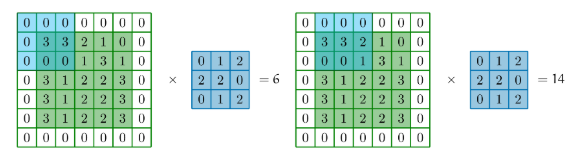


#### г) Расширенная свёртка (dilated convolution) с параметром расширения (dilation factor) равным 2
Расширенная свёртка позволяет увеличить поле обзора (receptive field) без увеличения размера ядра. В данном случае параметр расширения равен 2, что означает пропуск одного пикселя между элементами ядра.




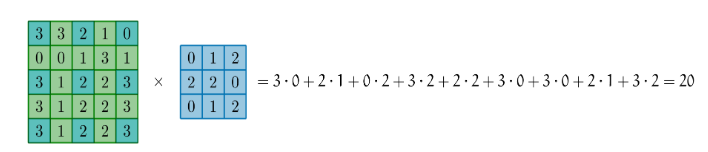


Расширенная свёртка не эквивалентна свёртке со сдвигом, так как она позволяет увеличить поле обзора, сохраняя разреженность ядра, в то время как свёртка со сдвигом просто уменьшает количество применяемых ядер.



[1]  
Задачи и примеры, представленные в данном разделе, основаны на материалах, посвящённых арифметике свёрток.

### 2. Классификатор слэшей

#### Введение
Рассматривается задача классификации изображений размера $4 \times 4$, содержащих прямые ($/$) и обратные ($\backslash$) слэши.





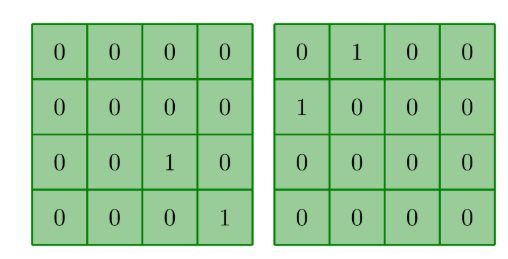

Цель состоит в разработке алгоритма, основанного на свёрточных операциях и пулинге, который позволяет эффективно различать два класса изображений.

#### Описание подхода
Для решения задачи предлагается использовать свёртку (convolutional operation), которая выделяет локальные признаки изображения. Свёртка применяется к исходному изображению с целью построения карты признаков (feature map), содержащей информацию о наличии искомых образов.



##### Принцип работы свёртки
1. **Ядро свёртки**: Для обнаружения обратных слэшей ($\backslash$) используется ядро свёртки, соответствующее их структуре.


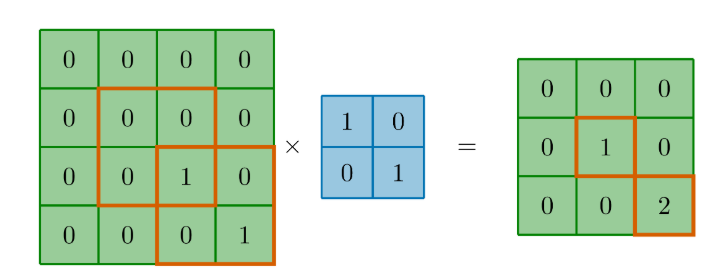

Аналогично можно сконструировать ядро для прямых слэшей ($/$).

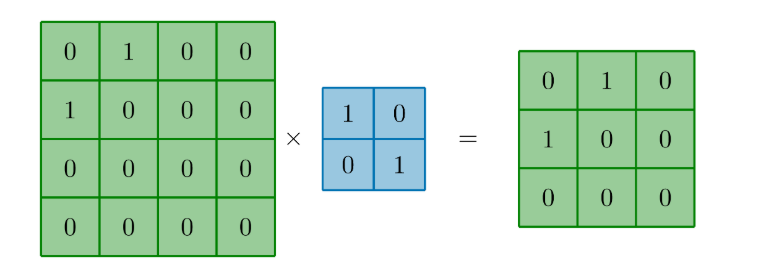


2. **Применение свёртки**: Ядро свёртки скользит по изображению, вычисляя скалярное произведение между весами ядра и соответствующими пикселями изображения. Результат записывается в карту признаков.
3. **Интерпретация результата**: На карте признаков максимальное значение сигнализирует о наличии искомого образа. Например:
   - Для обратного слэша ($\backslash$) максимальное значение равно 2.
   - Для прямого слэша ($/$) максимальное значение равно 1.


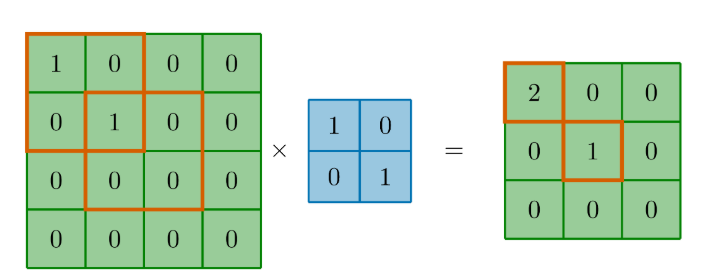


##### Алгоритм классификации
1. Применить свёртку с ядром, настроенным на обнаружение обратного слэша ($\backslash$).




2. Найти максимальное значение на полученной карте признаков.
3. Классифицировать изображение:
   - Если максимальное значение равно 2, изображение содержит обратный слэш ($\backslash$).
   - Если максимальное значение равно 1, изображение содержит прямой слэш ($/$).

##### Инвариантность к положению объекта
Свёртка обладает свойством инвариантности к сдвигу объекта на изображении. Это означает, что результат применения свёртки не зависит от местоположения искомого образа. Например, при перемещении обратного слэша ($\backslash$) в другую часть изображения максимальное значение на карте признаков остаётся равным 2.

##### Поле обзора (Receptive Field)
Поле обзора определяется как область исходного изображения, которая влияет на значение конкретного элемента карты признаков. Размер поля обзора зависит от размера ядра свёртки и количества последовательно применённых свёрток:
- Для ядра размера $2 \times 2$ поле обзора ограничено $2 \times 2$ пикселями.
- Для анализа более крупных структур (например, слэшей размера $3 \times 3$) требуется применение нескольких последовательных свёрток. Вторая свёртка анализирует уже преобразованное изображение, что позволяет косвенно учитывать информацию о большей области исходного изображения.

##### Ускорение роста поля обзора с помощью пулинга
Для увеличения поля обзора без значительного увеличения вычислительной сложности используется операция пулинга (pooling). Пулинг снижает размерность карты признаков, сохраняя наиболее значимую информацию. Это позволяет быстрее охватывать большие области изображения.


### 3. Анализ функциональности ядер свёрток

#### Введение
Рассматривается набор ядер для выполнения операций свёртки над изображениями. Каждое ядро выполняет определённую задачу по обработке и выделению признаков из исходных данных. Ниже представлен анализ функциональности каждого ядра на основе их структуры и воздействия на изображение.




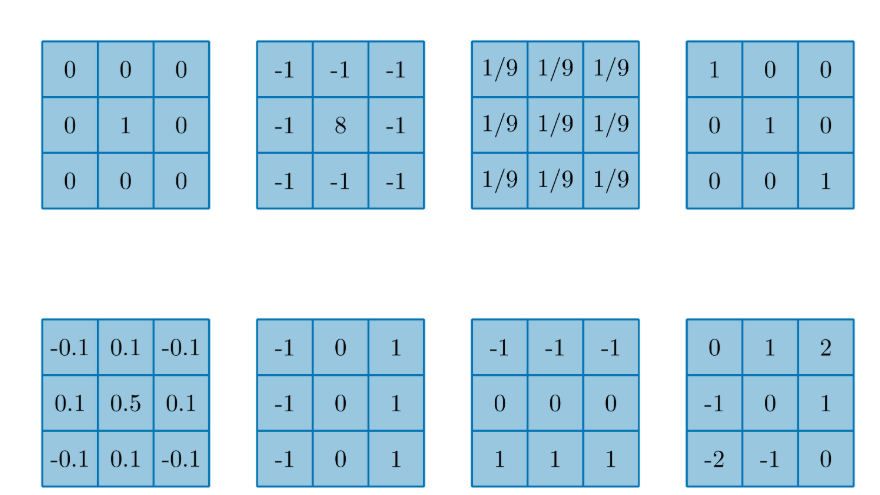


#### Описание ядер

1. **Ядро, не изменяющее изображение**  
   - **Описание**: Ядро имеет вид единичной матрицы или аналогичной структуры, которая оставляет значения пикселей без изменений.  
   - **Эффект**: Если добавить паддинг (padding), результатом применения такого ядра будет исходное изображение.  
   - **Применение**: Используется для проверки корректности реализации свёртки или сохранения исходных данных.

2. **Ядро для поиска контуров/границ**  
   - **Описание**: Ядро подчёркивает резкие изменения интенсивности пикселей, что соответствует границам объектов.  
   - **Эффект**: Выделяет контуры объектов на изображении.  
   - **Примеры**: Ядро может быть основано на разностях между соседними пикселями, например:  
$$
     \begin{bmatrix}
     -1 & -1 & -1 \\
     -1 & 8 & -1 \\
     -1 & -1 & -1
     \end{bmatrix}
$$

3. **Ядро для размытия изображения**  
   - **Описание**: Ядро усредняет значения пикселей в локальной области.  
   - **Эффект**: Размывает изображение, снижая уровень шума и сглаживая резкие переходы.  
   - **Примеры**: Гауссово ядро или простое усредняющее ядро, например:  
$$
     \begin{bmatrix}
     1/9 & 1/9 & 1/9 \\
     1/9 & 1/9 & 1/9 \\
     1/9 & 1/9 & 1/9
     \end{bmatrix}
$$

4. **Ядро для поиска слэшей**  
   - **Описание**: Ядро настроено на обнаружение диагональных структур, таких как прямые ($/$) или обратные ($\backslash$) слэши.  
   - **Эффект**: Выделяет области, соответствующие диагональным линиям.  
   - **Примеры**: Ядро для обратного слэша может иметь вид:  
$$
     \begin{bmatrix}
     0 & 0 & 1 \\
     0 & 1 & 0 \\
     1 & 0 & 0
     \end{bmatrix}
$$

5. **Ядро для перераспределения внимания к центру**  
   - **Описание**: Ядро увеличивает значимость центральных пикселей относительно периферийных.  
   - **Эффект**: Усиливает концентрацию информации в центральной части изображения, но не так агрессивно, как фильтры для выделения границ.  
   - **Примеры**: Ядро может быть основано на весах, убывающих от центра:  
$$
     \begin{bmatrix}
     0 & 0.1 & 0 \\
     0.1 & 0.6 & 0.1 \\
     0 & 0.1 & 0
     \end{bmatrix}
$$

6. **Ядро для поиска вертикальных границ**  
   - **Описание**: Ядро подчёркивает вертикальные изменения интенсивности пикселей.  
   - **Эффект**: Выделяет вертикальные границы объектов.  
   - **Примеры**: Ядро типа Sobel для вертикальных границ:  
$$
     \begin{bmatrix}
     -1 & 0 & 1 \\
     -2 & 0 & 2 \\
     -1 & 0 & 1
     \end{bmatrix}
$$

7. **Ядро для поиска горизонтальных границ**  
   - **Описание**: Ядро подчёркивает горизонтальные изменения интенсивности пикселей.  
   - **Эффект**: Выделяет горизонтальные границы объектов.  
   - **Примеры**: Ядро типа Sobel для горизонтальных границ:  
$$
     \begin{bmatrix}
     -1 & -2 & -1 \\
     0 & 0 & 0 \\
     1 & 2 & 1
     \end{bmatrix}
$$

8. **Ядро для поиска диагональных границ**  
   - **Описание**: Ядро выделяет изменения интенсивности вдоль диагоналей.  
   - **Эффект**: Подчёркивает диагональные границы или перепады.  
   - **Примеры**: Ядро для главной диагонали:  
$$
     \begin{bmatrix}
     1 & 0 & 0 \\
     0 & 1 & 0 \\
     0 & 0 & 1
     \end{bmatrix}
$$

Таким образом:

Каждое ядро выполняет уникальную задачу по обработке изображения, выделяя определённые признаки:
- **Контуры и границы**: Выделяются с помощью дифференциальных операторов.
- **Размытие**: Достигается за счёт усреднения значений пикселей.
- **Диагональные структуры**: Обнаруживаются с помощью специализированных ядер.
- **Перераспределение внимания**: Позволяет акцентировать центральную часть изображения.

Для более глубокого изучения свёрток и их применений рекомендуется обратиться к материалам курса по компьютерному зрению, например, Стэнфордского туториала.


###Свёрточный слой как частный случай полносвязного слоя  



#### Введение  
Свёрточные нейронные сети (CNN) широко применяются в задачах компьютерного зрения благодаря их способности эффективно обрабатывать пространственные данные, такие как изображения. Ключевым элементом CNN является **свёрточный слой**, который можно рассматривать как полносвязный слой с определёнными ограничениями. Это позволяет лучше понять его структуру, преимущества и принципы работы.  



### 1. Представление входного изображения  

Рассмотрим чёрно-белое изображение размером **4×4**. Его можно представить в виде матрицы:  

$$
X =
\begin{pmatrix}
x_{11} & x_{12} & x_{13} & x_{14} \\
x_{21} & x_{22} & x_{23} & x_{24} \\
x_{31} & x_{32} & x_{33} & x_{34} \\
x_{41} & x_{42} & x_{43} & x_{44}
\end{pmatrix},  
$$  

где $x_{ij}$ — значение пикселя в $i$-й строке и $j$-м столбце.  

**Общее число входных параметров:**  
$$4 \times 4 = 16.$$  

Эти 16 переменных являются входными данными для слоя.  



### 2. Полносвязный слой  

В полносвязном слое каждый входной нейрон соединён со всеми выходными.  

**Пример:**  
- Вход: 16 нейронов (пикселей).  
- Выход: 4 нейрона.  

**Количество весов:**  
$$16 \times 4 = 64.$$  

**Добавляем bias (по одному на каждый выходной нейрон):**  
$$64 + 4 = 68 \text{ параметров}.$$  

**Графическая интерпретация:**  
Полносвязный слой можно представить как полный граф связей между входными и выходными нейронами. Каждая связь имеет свой уникальный вес.  



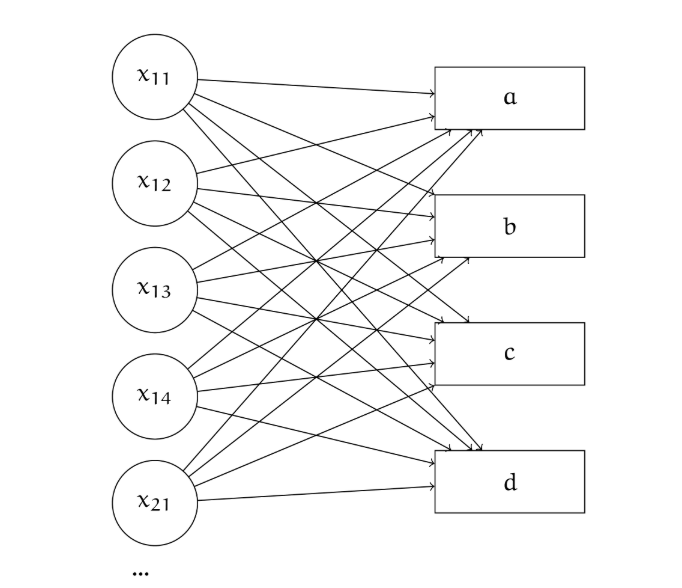



### 3. Свёрточный слой как ограниченный полносвязный  

Свёрточный слой вводит два ключевых ограничения:  

1. **Локальность связей**  
   Каждый выходной нейрон зависит не от всех входных, а только от небольшой локальной области (например, 3×3).  

2. **Разделение весов (weight sharing)**  
   Одинаковые веса применяются к разным участкам изображения.  

**Пример:**  
- Ядро свёртки: $3 \times 3$.  
- Вход: $4 \times 4$.  
- Выход: $2 \times 2$ (при stride=1 и без padding).  

**Формула для выходных значений:**  

- Выход $Y$ вычисляется как:  
$$
y_{ij} = \sum_{m=0}^{2} \sum_{n=0}^{2} w_{mn} \cdot x_{i+m, j+n} + b,
$$  
где $w_{mn}$ — веса ядра, $b$ — bias.  

**Конкретные вычисления:**  

1. $y_{11} = w_{00}x_{11} + w_{01}x_{12} + w_{02}x_{13} + w_{10}x_{21} + w_{11}x_{22} + w_{12}x_{23} + w_{20}x_{31} + w_{21}x_{32} + w_{22}x_{33} + b$  
2. $y_{12} = w_{00}x_{12} + w_{01}x_{13} + w_{02}x_{14} + w_{10}x_{22} + w_{11}x_{23} + w_{12}x_{24} + w_{20}x_{32} + w_{21}x_{33} + w_{22}x_{34} + b$  
3. $y_{21} = w_{00}x_{21} + w_{01}x_{22} + w_{02}x_{23} + w_{10}x_{31} + w_{11}x_{32} + w_{12}x_{33} + w_{20}x_{41} + w_{21}x_{42} + w_{22}x_{43} + b$  
4. $y_{22} = w_{00}x_{22} + w_{01}x_{23} + w_{02}x_{24} + w_{10}x_{32} + w_{11}x_{33} + w_{12}x_{34} + w_{20}x_{42} + w_{21}x_{43} + w_{22}x_{44} + b$  

**Количество параметров:**  
- Веса ядра: $3 \times 3 = 9$.  
- Bias: $1$.  
- **Итого:** $10$ (вместо 68 в полносвязном слое).  





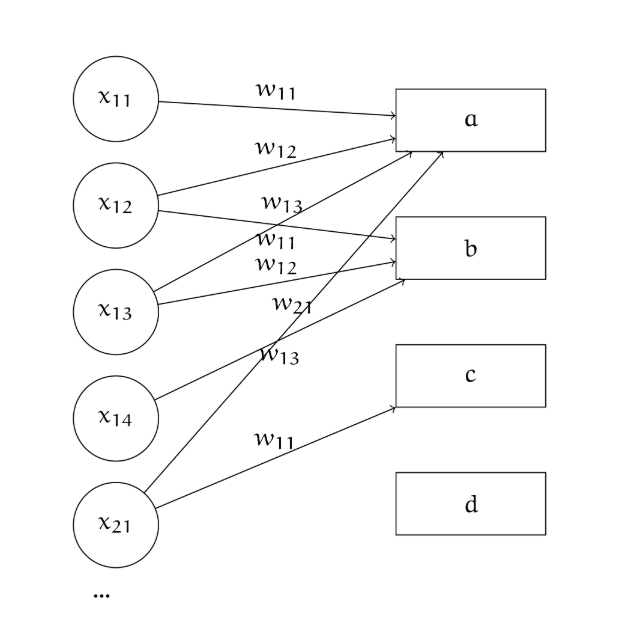


**Замечание:**  
Благодаря разделению весов, количество параметров значительно сокращается. Это делает обучение модели более эффективным.  



### 4. Матричное представление свёртки  

Свёртку можно выразить через матричное умножение, если:  
1. Развернуть входное изображение в вектор $\mathbf{x}$ (размер $16 \times 1$).  
2. Построить матрицу $\mathbf{W}$ (размер $4 \times 16$), где каждая строка соответствует одному выходному нейрону.  

**Пример для $y_{11}$:**  
$$
\mathbf{W}_1 =
\begin{pmatrix}
w_{00} & w_{01} & w_{02} & 0 & w_{10} & w_{11} & w_{12} & 0 & w_{20} & w_{21} & w_{22} & 0 & 0 & 0 & 0 & 0
\end{pmatrix}
$$  

**Полная матрица $\mathbf{W}$:**  
$$
\mathbf{W} =
\begin{pmatrix}
w_{00} & w_{01} & w_{02} & 0 & w_{10} & w_{11} & w_{12} & 0 & w_{20} & w_{21} & w_{22} & 0 & 0 & 0 & 0 & 0 \\
0 & w_{00} & w_{01} & w_{02} & 0 & w_{10} & w_{11} & w_{12} & 0 & w_{20} & w_{21} & w_{22} & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & w_{00} & w_{01} & w_{02} & 0 & w_{10} & w_{11} & w_{12} & 0 & w_{20} & w_{21} & w_{22} & 0 \\
0 & 0 & 0 & 0 & 0 & w_{00} & w_{01} & w_{02} & 0 & w_{10} & w_{11} & w_{12} & 0 & w_{20} & w_{21} & w_{22}
\end{pmatrix}
$$  

**Выход:**  
$$
\mathbf{y} = \mathbf{W} \mathbf{x} + \mathbf{b},  
$$  
где $\mathbf{b} = (b, b, b, b)^T$.  

**Замечание:**  
Матрица $\mathbf{W}$ содержит много нулей (для неиспользуемых связей) и повторяющиеся веса (для переиспользуемых связей).  



### 4. Обратное распространение ошибки в свёрточном слое  

Обратное распространение ошибки в свёрточном слое выполняется аналогично полносвязному слою, но с учётом особенностей структуры весов.

#### Градиент по весам  

Для каждого веса градиент вычисляется как сумма производных по всем выходам, в которые этот вес входит. Например, для веса $w_{11}$:

$$
\frac{\partial L}{\partial w_{11}} = \frac{\partial L}{\partial a} \cdot x_{11} + \frac{\partial L}{\partial b} \cdot x_{12} + \frac{\partial L}{\partial c} \cdot x_{21} + \frac{\partial L}{\partial d} \cdot x_{22}.
$$

Аналогично вычисляются градиенты для остальных весов:

- Для $w_{12}$:  
$$
\frac{\partial L}{\partial w_{12}} = \frac{\partial L}{\partial a} \cdot x_{12} + \frac{\partial L}{\partial b} \cdot x_{13} + \frac{\partial L}{\partial c} \cdot x_{22} + \frac{\partial L}{\partial d} \cdot x_{23}.
$$

- Для $w_{21}$:  
$$
\frac{\partial L}{\partial w_{21}} = \frac{\partial L}{\partial a} \cdot x_{21} + \frac{\partial L}{\partial b} \cdot x_{22} + \frac{\partial L}{\partial c} \cdot x_{31} + \frac{\partial L}{\partial d} \cdot x_{32}.
$$

- Для $w_{22}$:  
$$
\frac{\partial L}{\partial w_{22}} = \frac{\partial L}{\partial a} \cdot x_{22} + \frac{\partial L}{\partial b} \cdot x_{23} + \frac{\partial L}{\partial c} \cdot x_{32} + \frac{\partial L}{\partial d} \cdot x_{33}.
$$

#### Замечание:  
Каждый вес фигурирует в нескольких выходах, поэтому его градиент — это сумма вкладов из всех этих выходов.  



#### Градиент по входам  

Производная по входным значениям также представляет собой свёртку, но с использованием "развернутого" ядра. Это позволяет эффективно вычислять градиенты для обратного распространения ошибки.

**Формула для градиента по входам:**  
$$
\frac{\partial L}{\partial x_{ij}} = \sum_{m,n} \frac{\partial L}{\partial y_{i-m, j-n}} \cdot w_{mn},
$$  
где сумма берётся по всем позициям, где вес $w_{mn}$ был применён к входу $x_{ij}$.

**Пример вычисления градиента для конкретного входа:**  
Рассмотрим пиксель $x_{22}$, который влияет на выходы $a, b, c, d$. Его градиент вычисляется как:

$$
\frac{\partial L}{\partial x_{22}} = \frac{\partial L}{\partial a} \cdot w_{22} + \frac{\partial L}{\partial b} \cdot w_{21} + \frac{\partial L}{\partial c} \cdot w_{12} + \frac{\partial L}{\partial d} \cdot w_{11}.
$$

Аналогично вычисляются градиенты для остальных входных пикселей.



### 5. Обобщающая формула для обратного распространения  

Обратное распространение ошибки в свёрточном слое можно обобщить через операции свёртки:

1. **Градиент по весам:**  
$$
\frac{\partial L}{\partial w_{mn}} = \sum_{i,j} \frac{\partial L}{\partial y_{ij}} \cdot x_{i+m, j+n}.
$$

2. **Градиент по входам:**  
$$
\frac{\partial L}{\partial x_{ij}} = \sum_{m,n} \frac{\partial L}{\partial y_{i-m, j-n}} \cdot w_{mn}.
$$

Эти формулы показывают, что обратное распространение в свёрточном слое можно реализовать через операции свёртки, что делает процесс вычислительно эффективным.



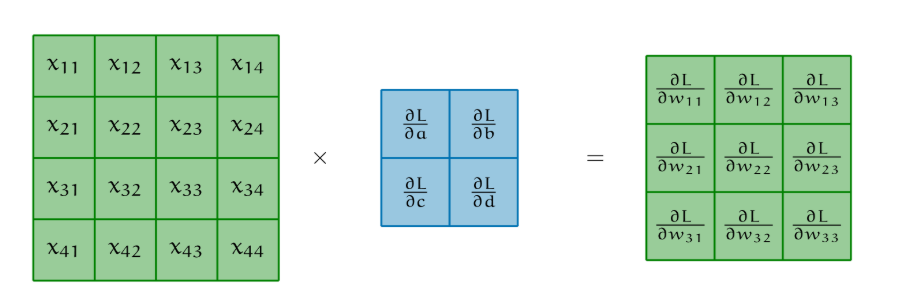


**Замечание:**  
Обратное распространение ошибки в свёрточном слое можно реализовать через операции свёртки, что делает процесс вычислительно эффективным.  

##Анализ числа параметров в полносвязных и свёрточных нейронных сетях  



#### Введение  
Нейронные сети являются мощным инструментом для обработки данных, в частности изображений. Полносвязные и свёрточные архитектуры имеют существенные различия в структуре и вычислительной сложности. В данной работе рассматривается влияние архитектурных решений (таких как свёртки, пулинг, zero padding и stride) на размер выходов и число обучаемых параметров. Особое внимание уделяется сравнению числа параметров в полносвязных и свёрточных сетях.



### 1. Полносвязная сеть  

На вход подаётся изображение рукописной цифры размером $28 \times 28$. Каждый пиксель рассматривается как отдельная переменная, что даёт $28 \cdot 28 = 784$ входных параметра.  

#### Архитектура сети:  
1. **Первый слой**: Полносвязный слой с $1000$ нейронами.  
2. **Второй слой**: Полносвязный слой для классификации на $10$ классов.  

#### Расчёт числа параметров:  
- **Первый слой**:  
  - Количество весов: $784 \cdot 1000 = 784000$.  
  - Количество свободных членов (bias): $1000$.  
  - Общее число параметров: $784000 + 1000 = 785000$.  

- **Второй слой**:  
  - Количество весов: $1000 \cdot 10 = 10000$.  
  - Количество свободных членов (bias): $10$.  
  - Общее число параметров: $10000 + 10 = 10010$.  

**Общее число параметров сети:**  
$$
N_{\text{params}} = 785000 + 10010 = 795010.
$$



### 2. Свёрточная сеть  

Рассматривается свёрточная архитектура, состоящая из следующих шагов:  
1. **Первая свёртка**: $6$ ядер размером $5 \times 5$.  
2. **Max-pooling**: Размер окна $2 \times 2$.  
3. **Вторая свёртка**: $16$ ядер размером $5 \times 5$.  
4. **Max-pooling**: Размер окна $2 \times 2$.  
5. **Вытягивание**: Преобразование выхода в вектор.  
6. **Полносвязные слои**: Три слоя размеров $120$, $84$, $10$.  

#### Определение размеров выходов:  
1. **Размер входа**: $28 \times 28$.  
2. **После первой свёртки**:  
   - Размер выхода: $(28 - 5 + 1) \times (28 - 5 + 1) = 24 \times 24$.  
   - Число каналов: $6$.  
   - Выход: $24 \times 24 \times 6$.  

3. **После первого пулинга**:  
   - Размер выхода: $\frac{24}{2} \times \frac{24}{2} = 12 \times 12$.  
   - Число каналов: $6$.  
   - Выход: $12 \times 12 \times 6$.  

4. **После второй свёртки**:  
   - Размер выхода: $(12 - 5 + 1) \times (12 - 5 + 1) = 8 \times 8$.  
   - Число каналов: $16$.  
   - Выход: $8 \times 8 \times 16$.  

5. **После второго пулинга**:  
   - Размер выхода: $\frac{8}{2} \times \frac{8}{2} = 4 \times 4$.  
   - Число каналов: $16$.  
   - Выход: $4 \times 4 \times 16$.  

6. **После вытягивания**:  
   - Размер выхода: $4 \cdot 4 \cdot 16 = 256$.  

7. **После первого полносвязного слоя**:  
   - Размер выхода: $120$.  

8. **После второго полносвязного слоя**:  
   - Размер выхода: $84$.  

9. **После третьего полносвязного слоя**:  
   - Размер выхода: $10$.  

10. **После softmax**:  
    - Размер выхода: $10$.  

#### Расчёт числа параметров:  
1. **Первая свёртка**:  
   - Число параметров: $(5 \cdot 5 + 1) \cdot 6 = 156$.  

2. **Вторая свёртка**:  
   - Число параметров: $(5 \cdot 5 + 1) \cdot 16 = 416$.  

3. **Полносвязные слои**:  
   - Первый слой: $256 \cdot 120 + 120 = 30840$.  
   - Второй слой: $120 \cdot 84 + 84 = 10164$.  
   - Третий слой: $84 \cdot 10 + 10 = 850$.  

**Общее число параметров сети:**  
$$
N_{\text{params}} = 156 + 416 + 30840 + 10164 + 850 = 42426.
$$



### 3. Zero Padding  

Добавление zero padding ($p = 2$) увеличивает размер выхода после каждой свёртки. Например:  
- После первой свёртки: $(28 - 5 + 2 \cdot 2 + 1) \times (28 - 5 + 2 \cdot 2 + 1) = 28 \times 28$.  
- После второй свёртки: $(14 - 5 + 2 \cdot 2 + 1) \times (14 - 5 + 2 \cdot 2 + 1) = 14 \times 14$.  

Число параметров свёрток остаётся неизменным, однако увеличиваются размеры выходов после пулинга, что влияет на число параметров в полносвязных слоях.

#### Новые размеры выходов:  
1. **После первой свёртки**: $28 \times 28 \times 6$.  
2. **После первого пулинга**: $14 \times 14 \times 6$.  
3. **После второй свёртки**: $14 \times 14 \times 16$.  
4. **После второго пулинга**: $7 \times 7 \times 16$.  
5. **После вытягивания**: $7 \cdot 7 \cdot 16 = 784$.  

#### Новое число параметров:  
1. **Первая свёртка**: $156$.  
2. **Вторая свёртка**: $416$.  
3. **Полносвязные слои**:  
   - Первый слой: $784 \cdot 120 + 120 = 94200$.  
   - Второй слой: $120 \cdot 84 + 84 = 10164$.  
   - Третий слой: $84 \cdot 10 + 10 = 850$.  

**Общее число параметров сети:**  
$$
N_{\text{params}} = 156 + 416 + 94200 + 10164 + 850 = 105786.
$$



### 4. Stride  

Использование stride $s = 2$ уменьшает размер выхода после каждой свёртки. Например:  
- После первой свёртки: $\frac{28 - 5}{2} + 1 = 12$.  
- После второй свёртки: $\frac{6 - 5}{2} + 1 = 1$.  

Если размер выхода становится слишком маленьким, то max-pooling может сделать дальнейшую обработку невозможной.

#### Новые размеры выходов:  
1. **После первой свёртки**: $12 \times 12 \times 6$.  
2. **После первого пулинга**: $6 \times 6 \times 6$.  
3. **После второй свёртки**: $1 \times 1 \times 16$.  
4. **После второго пулинга**: Модель разваливается.  


### Поле обзора свёрточной нейронной сети

#### Введение
В задачах компьютерного зрения свёрточные нейронные сети (СНС) играют ключевую роль благодаря своей способности извлекать иерархические признаки из изображений. Одним из важнейших понятий в работе СНС является **поле обзора (receptive field)**, которое определяет область входного изображения, влияющую на значение выходного нейрона. В данной работе рассматривается задача определения минимального количества свёрточных слоёв, необходимых для того, чтобы поле обзора охватило объект заданного размера.



#### Постановка задачи
Имеется изображение большого размера, содержащее объект размером $ 300 \times 300 $ пикселей. Для поиска этого объекта используется свёрточная нейронная сеть с ядрами свёртки размером $ 3 \times 3 $. Дополнение нулями (zero padding) не применяется. Требуется определить, через сколько слоёв поле обзора сети впервые охватит объект целиком.



#### Интуитивное объяснение поля обзора
Чтобы лучше понять концепцию поля обзора, рассмотрим аналогию с наблюдением за слоном. Представьте, что вы стоите очень близко к слону. Если вы смотрите только на его хобот, то можете ошибочно принять его за змею. Однако, если отойти подальше и увидеть слона целиком, вы сможете правильно идентифицировать его как слона.

Аналогично, свёрточная нейронная сеть должна "увидеть" объект целиком, чтобы сделать правильные выводы. Если поле обзора сети слишком маленькое, она может упустить важные детали объекта. Например, если поле обзора составляет $ 3 \times 3 $ пикселя, сеть сможет анализировать только локальные участки изображения, но не весь объект размером $ 300 \times 300 $ пикселей.

На рисунке ниже показан пример применения двух последовательных свёрток размером $ 3 \times 3 $ к изображению размером $ 5 \times 5 $. После двух свёрток вся информация о начальной картинке "сворачивается" в один пиксель, который содержит информацию о всей области $ 5 \times 5 $. Это демонстрирует, как поле обзора увеличивается с каждым слоем.



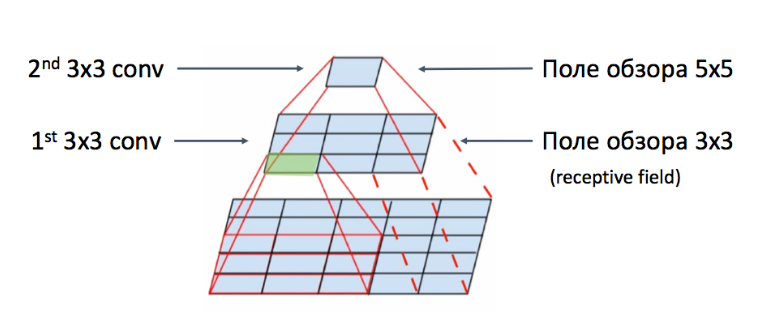



*Рисунок 1. Увеличение поля обзора при последовательном применении свёрток.*



#### Теоретическая основа
Поле обзора свёрточной нейронной сети определяется как область входного изображения, которая оказывает влияние на значение выходного нейрона. На каждом слое свёртки размер поля обзора увеличивается за счёт применения операции свёртки.

Для свёртки размером $ 3 \times 3 $ без дополнения нулями размер поля обзора на $ n $-м слое можно выразить рекуррентно:
$$
m_n = m_{n-1} + 2,
$$
где $ m_0 = 1 $ — начальный размер поля обзора (один пиксель).

Разрешая рекуррентное соотношение, получаем явную формулу:
$$
m_n = 2n + 1.
$$

Таким образом, поле обзора на $ n $-м слое составляет $ (2n + 1) \times (2n + 1) $.



#### Подробный разбор задачи
1. **Начальное поле обзора**:  
   На первом слое поле обзора составляет $ 3 \times 3 $ пикселя. Это означает, что каждый выходной нейрон первого слоя зависит только от области входного изображения размером $ 3 \times 3 $.

2. **Увеличение поля обзора**:  
   При применении второй свёртки поле обзора увеличивается до $ 5 \times 5 $. Это происходит потому, что каждая новая свёртка "добавляет" по одному пикселю с каждой стороны предыдущего поля обзора. Таким образом, после $ n $-го слоя поле обзора составит:
   $$
   (2n + 1) \times (2n + 1).
   $$

3. **Определение минимального количества слоёв**:  
   Для того чтобы поле обзора охватило объект размером $ 300 \times 300 $, необходимо выполнить условие:
   $$
   2n + 1 \geq 300.
   $$

   Решая это неравенство относительно $ n $, получаем:
   $$
   2n \geq 299 \quad \Rightarrow \quad n \geq 149.5.
   $$

   Так как количество слоёв должно быть целым числом, округляем результат вверх:
   $$
   n = 150.
   $$



#### Анализ результата
Для охвата объекта размером $ 300 \times 300 $ требуется $ 150 $ свёрточных слоёв. Однако такое количество слоёв является чрезмерным, что приводит к увеличению вычислительной сложности и затрат ресурсов. Для ускоренного роста поля обзора могут быть использованы следующие методы:
1. **Пулинг (pooling):** Уменьшает размерность данных, увеличивая эффективное поле обзора.
2. **Расширенные свёртки (dilated convolutions):** Позволяют увеличивать поле обзора без увеличения количества параметров.
3. **Свёртки со сдвигами (strided convolutions):** Уменьшают размер выходного тензора, увеличивая поле обзора.





#### **б) Свёртка размера $ k \times k $, где $ k $ — нечётное число**

Для свёртки размером $ k \times k $ без дополнения нулями (zero padding) поле обзора увеличивается на $ k - 1 $ пикселей на каждом слое. Это связано с тем, что каждая свёртка "добавляет" $ k - 1 $ новых пикселей к текущему полю обзора.

Формула для поля обзора после $ n $-го слоя:
$$
m_n = m_0 + n \cdot (k - 1),
$$
где $ m_0 = 1 $ — начальный размер поля обзора.

Разрешая это уравнение относительно $ n $, получаем:
$$
m_n = 1 + n \cdot (k - 1).
$$

Для того чтобы охватить объект размером $ 300 \times 300 $, необходимо выполнить условие:
$$
1 + n \cdot (k - 1) \geq 300.
$$

Решая неравенство относительно $ n $, получаем:
$$
n \geq \frac{299}{k - 1}.
$$

Таким образом, минимальное количество слоёв равно:
$$
\boxed{n = \lceil \frac{299}{k - 1} \rceil},
$$
где $ \lceil x \rceil $ — округление вверх до ближайшего целого числа.



#### **в) Свёртки размера $ 3 \times 3 $ с дополнением нулями и max-pooling**

Если используется дополнение нулями (zero padding), то размер выходного тензора остаётся неизменным после каждой свёртки. Однако применение max-pooling размера $ 2 \times 2 $ уменьшает размерность выходного тензора в два раза по каждой оси.

Поле обзора после $ n $-го слоя можно выразить через рекуррентное соотношение:
$$
m_n = m_{n-1} + 2,
$$
где $ m_0 = 1 $.

Разрешая это уравнение, получаем:
$$
m_n = 1 + 2n.
$$

Однако из-за применения max-pooling эффективный рост поля обзора ускоряется. После каждого слоя с max-pooling поле обзора удваивается. Таким образом, формула для поля обзора принимает вид:
$$
m_n = 1 + 2 \cdot (2^n - 1).
$$

Для того чтобы охватить объект размером $ 300 \times 300 $, необходимо выполнить условие:
$$
1 + 2 \cdot (2^n - 1) \geq 300.
$$

Решая неравенство:
$$
2 \cdot (2^n - 1) \geq 299 \quad \Rightarrow \quad 2^n \geq 150.5.
$$

Логарифмируя обе части по основанию 2:
$$
n \geq \log_2(150.5).
$$

Вычисляя значение логарифма:
$$
n \geq 7.23.
$$

Таким образом, минимальное количество слоёв равно:
$$
\boxed{n = 8}.
$$



#### **г) Замена max-pooling на свёртки со сдвигом**

Если вместо max-pooling используется свёртка со сдвигом $ s = 2 $, то размер выходного тензора уменьшается аналогично случаю с max-pooling. Поле обзора также растёт быстрее благодаря сдвигу.


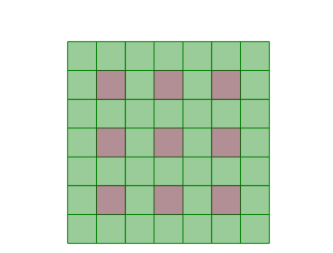


Формула для поля обзора:
$$
m_n = 1 + (2^n - 1) \cdot (k - 1),
$$
где $ k = 3 $.

Подставляя $ k = 3 $:
$$
m_n = 1 + (2^n - 1) \cdot 2.
$$

Для того чтобы охватить объект размером $ 300 \times 300 $, необходимо выполнить условие:
$$
1 + (2^n - 1) \cdot 2 \geq 300.
$$

Решая неравенство:
$$
(2^n - 1) \cdot 2 \geq 299 \quad \Rightarrow \quad 2^n \geq 150.5.
$$

Логарифмируя:
$$
n \geq \log_2(150.5).
$$

Вычисляя значение логарифма:
$$
n \geq 7.23.
$$

Таким образом, минимальное количество слоёв равно:
$$
\boxed{n = 8}.
$$



#### **д) Общее уравнение для поля обзора**

Общее уравнение для поля обзора можно записать следующим образом:
$$
m_{n-1} = m_n - (s - 1) - \frac{k - 1}{d},
$$
где:
- $ s $ — величина сдвига,
- $ k $ — размер свёртки,
- $ d $ — размер пулинга,
- $ n $ — номер слоя.

Разрешая это уравнение рекуррентно, можно найти поле обзора для любого слоя.

### **е) Расширенные свёртки (dilated convolution)**

#### Введение
Рассматривается задача определения размера поля видимости (receptive field) для расширенных свёрток (dilated convolution). Параметр расширения обозначен как $ r $, размер ядра свёртки — как $ k $, а номер текущего слоя — как $ n $. Требуется вывести формулу для поля видимости после $ n $-го слоя.




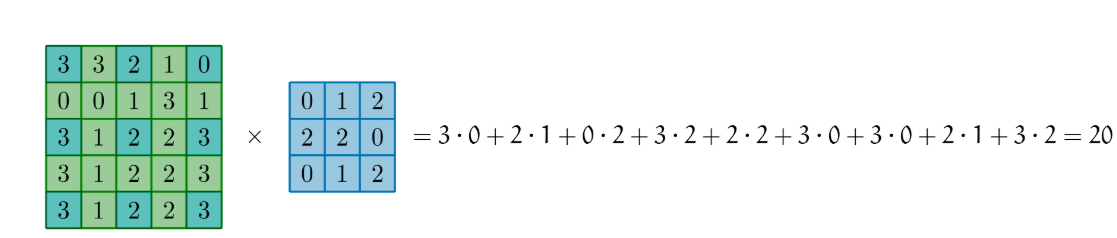


#### Теоретическая основа
1. **Эффективный размер свёртки**  
   При использовании расширенной свёртки с параметром расширения $ r $, ядро свёртки "растягивается" за счёт пропусков между элементами. Эффективный размер свёртки $ k_{\text{eff}} $ определяется следующим образом:
$$
   k_{\text{eff}} = k + (k - 1) \cdot (r - 1),
$$
   где:
   - $ k $ — исходный размер ядра свёртки,
   - $ r $ — параметр расширения,
   - $ (k - 1) \cdot (r - 1) $ — количество дополнительных пикселей, добавляемых за счёт расширения.

   Например:
   - Если $ k = 3 $ и $ r = 2 $, то $ k_{\text{eff}} = 3 + (3 - 1) \cdot (2 - 1) = 5 $.
   - Если $ k = 3 $ и $ r = 3 $, то $ k_{\text{eff}} = 3 + (3 - 1) \cdot (3 - 1) = 7 $.

2. **Рост поля видимости**  
   Поле видимости увеличивается на величину $ k_{\text{eff}} - 1 $ на каждом слое. Обозначим поле видимости после $ n $-го слоя как $ m_n $. Тогда рекуррентное соотношение имеет вид:
$$
   m_n = m_{n-1} + (k_{\text{eff}} - 1),
$$
   где $ m_0 = 1 $ — начальный размер поля видимости.

3. **Явная формула для поля видимости**  
   Разрешая рекуррентное соотношение, получаем явную формулу:
$$
   m_n = 1 + n \cdot (k_{\text{eff}} - 1).
$$

4. **Подстановка $ k_{\text{eff}} $**  
   Подставляя выражение для $ k_{\text{eff}} $ в формулу, получаем:
$$
   m_n = 1 + n \cdot \big(k + (k - 1) \cdot (r - 1) - 1\big).
$$

   Упрощая:
$$
   m_n = 1 + n \cdot \big((k - 1) \cdot r\big).
$$

5. **Итоговая формула**  
   Таким образом, размер поля видимости после $ n $-го слоя равен:
$$
   \boxed{m_n = \big[(k - 1) \cdot r \cdot n + 1\big] \times \big[(k - 1) \cdot r \cdot n + 1\big]}.
$$



### **ж) Влияние нормализации по батчам и остаточных связей**

1. **Нормализация по батчам (Batch Normalization)**  
   Нормализация по батчам применяется к активациям нейросети и не изменяет их пространственную структуру. Она лишь нормализует значения активаций, чтобы ускорить обучение и стабилизировать градиенты. Таким образом, нормализация по батчам **не влияет на размер поля видимости**.

2. **Остаточные связи (Skip Connections)**  
   Остаточные связи добавляют выход одного слоя к выходу другого слоя, минуя несколько промежуточных слоёв. Поскольку остаточные связи не изменяют пространственную структуру данных, они также **не влияют на размер поля видимости**.


##8. Мелкие задачки
### **а) Размер дополнения (padding) для сохранения размера изображения**

#### Постановка задачи
Используется свёртка размера $ k \times k $. Требуется определить размер дополнения (padding), необходимого для того, чтобы размер изображения после применения свёртки не изменился.



#### Решение
1. **Уменьшение размера изображения без дополнения**  
   При применении свёртки размера $ k \times k $ без дополнения (padding), размер выходного изображения уменьшается на $ k - 1 $ пикселей по каждой оси. Это связано с тем, что ядро свёртки "срезает" $ \lfloor k / 2 \rfloor $ пикселей с каждой стороны изображения.

2. **Компенсация среза дополнением**  
   Чтобы компенсировать это уменьшение, необходимо добавить рамку из нулей (padding) шириной $ p = \lfloor k / 2 \rfloor $ вокруг изображения. Таким образом:
   $$
   p = \lfloor k / 2 \rfloor.
   $$

3. **Примеры**  
   - Для свёртки $ 3 \times 3 $: $ p = \lfloor 3 / 2 \rfloor = 1 $.  
   - Для свёртки $ 5 \times 5 $: $ p = \lfloor 5 / 2 \rfloor = 2 $.  
   - Для свёртки $ 7 \times 7 $: $ p = \lfloor 7 / 2 \rfloor = 3 $.

4. **Итоговая формула**  
   Размер дополнения для сохранения размера изображения равен:
   $$
   \boxed{p = \lfloor k / 2 \rfloor}.
   $$



### **б) Размер дополнения (padding) при использовании сдвига (stride)**

#### Постановка задачи
Используется свёртка размера $ k \times k $ со сдвигом (stride) $ s $. Требуется определить размер дополнения (padding), необходимого для того, чтобы размер изображения после применения свёртки не изменился.



#### Решение
1. **Уменьшение размера изображения при сдвиге**  
   При применении свёртки со сдвигом $ s $, размер выходного изображения по каждой оси вычисляется по формуле:
   $$
   W_{\text{out}} = \frac{W_{\text{in}} + 2p - k}{s} + 1,
   $$
   где:
   - $ W_{\text{in}} $ — исходный размер изображения,
   - $ p $ — размер дополнения,
   - $ k $ — размер ядра свёртки,
   - $ s $ — величина сдвига.

2. **Условие сохранения размера**  
   Чтобы размер изображения не изменился ($ W_{\text{out}} = W_{\text{in}} $), необходимо выполнить условие:
   $$
   W_{\text{in}} = \frac{W_{\text{in}} + 2p - k}{s} + 1.
   $$

3. **Разрешение относительно $ p $**  
   Упрощая уравнение:
   $$
   W_{\text{in}} - 1 = \frac{W_{\text{in}} + 2p - k}{s}.
   $$
   Умножая обе части на $ s $:
   $$
   s \cdot (W_{\text{in}} - 1) = W_{\text{in}} + 2p - k.
   $$
   Перенося $ W_{\text{in}} $ и $ k $ в левую часть:
   $$
   s \cdot W_{\text{in}} - s = W_{\text{in}} + 2p - k.
   $$
   Группируя члены с $ W_{\text{in}} $:
   $$
   (s - 1) \cdot W_{\text{in}} + k - s = 2p.
   $$
   Разрешая относительно $ p $:
   $$
   p = \frac{(s - 1) \cdot W_{\text{in}} + k - s}{2}.
   $$

4. **Итоговая формула**  
   Размер дополнения для сохранения размера изображения при сдвиге равен:
   $$
   \boxed{p = \frac{(s - 1) \cdot W_{\text{in}} + k - s}{2}}.
   $$



### **в) Количество параметров в свёрточном слое**

#### Постановка задачи
На вход свёрточного слоя подаётся изображение с $ C_{\text{in}} $ каналами размера $ W \times H $. Используется $ C_{\text{out}} $ фильтров размера $ W_k \times H_k $. Требуется определить общее количество параметров, которые необходимо оценить.



#### Решение
1. **Параметры одного фильтра**  
   Каждый фильтр имеет размер $ W_k \times H_k \times C_{\text{in}} $, так как он применяется ко всем каналам входного изображения. Кроме того, каждый фильтр имеет один смещаемый параметр (bias).

   Общее количество параметров для одного фильтра:
   $$
   W_k \cdot H_k \cdot C_{\text{in}} + 1.
   $$

2. **Общее количество фильтров**  
   Всего используется $ C_{\text{out}} $ фильтров.

3. **Общее количество параметров**  
   Общее количество параметров для всех фильтров:
   $$
   (W_k \cdot H_k \cdot C_{\text{in}} + 1) \cdot C_{\text{out}}.
   $$

4. **Итоговая формула**  
   Общее количество параметров равно:
   $$
   \boxed{(W_k \cdot H_k \cdot C_{\text{in}} + 1) \cdot C_{\text{out}}}.
   $$



### **г) Количество параметров для сепарабельных свёрток**

#### Постановка задачи
Все свёртки являются сепарабельными, то есть их ядра можно представить в виде произведения двух векторов размеров $ k \times 1 $ и $ 1 \times k $. Требуется определить общее количество параметров в условиях предыдущего пункта.



#### Решение
1. **Параметры одного сепарабельного фильтра**  
   Для сепарабельной свёртки ядро разделяется на два этапа:
   - Первый этап: применение $ k \times 1 $-фильтра к каждому каналу входного изображения. Количество параметров для этого этапа:
$$
     k \cdot C_{\text{in}}.
$$
   - Второй этап: применение $ 1 \times k $-фильтра к результату первого этапа. Количество параметров для этого этапа:
$$
     k \cdot C_{\text{out}}.
$$
   - Смещаемый параметр (bias) добавляется на втором этапе: $ 1 $ параметр.

   Общее количество параметров для одного фильтра:
   $$
   (k \cdot C_{\text{in}} + k \cdot C_{\text{out}} + 1).
   $$

2. **Общее количество фильтров**  
   Всего используется $ C_{\text{out}} $ фильтров.

3. **Общее количество параметров**  
   Общее количество параметров для всех фильтров:
   $$
   ((k + k) \cdot C_{\text{in}} + 1) \cdot C_{\text{out}}.
   $$

4. **Итоговая формула**  
   Общее количество параметров равно:
   $$
   \boxed{((W_k + H_k) \cdot C_{\text{in}} + 1) \cdot C_{\text{out}}}.
   $$


##9. **Скользящее среднее как одномерная свёртка**

#### Введение
Скользящее среднее — это метод сглаживания временных рядов, который позволяет уменьшить шум и выделить основную тенденцию данных. Этот процесс можно интерпретировать как одномерную свёртку (1D convolution). Рассмотрим, как выглядит ядро такой свёртки, физический смысл её параметров и особенности работы.



### **1. Ядро свёртки для скользящего среднего**

#### Определение
Для вычисления скользящего среднего используется одномерная свёртка с ядром вида:
$$
\text{Ядро} = \left( \frac{1}{k}, \frac{1}{k}, \dots, \frac{1}{k} \right),
$$
где $ k $ — размер окна сглаживания (длина ядра).

Пример:
- При $ k = 3 $ ядро имеет вид:
  $$
  \left( \frac{1}{3}, \frac{1}{3}, \frac{1}{3} \right).
  $$

#### Физический смысл
1. **Размер окна ($ k $):**
   - Размер окна определяет количество соседних элементов, которые учитываются при вычислении среднего значения.
   - Чем больше $ k $, тем сильнее сглаживаются данные, но тем больше теряется локальная информация о колебаниях.

2. **Коэффициенты ядра:**
   - Все коэффициенты ядра равны $ \frac{1}{k} $, что соответствует равномерному взвешиванию всех элементов в окне.
   - Это гарантирует, что результат является простым арифметическим средним значением.



### **2. Применение свёртки к временному ряду**

#### Пример
Пусть задан временной ряд:
$$
(x_1, x_2, x_3, x_4, x_5, x_6).
$$

Используем ядро размера $ k = 3 $:
$$
\text{Ядро} = \left( \frac{1}{3}, \frac{1}{3}, \frac{1}{3} \right).
$$

Применим свёртку без дополнения нулями:
- Вычислим скользящее среднее для каждого окна:
  $$
  \begin{aligned}
  &\text{Первое значение: } \frac{x_1 + x_2 + x_3}{3}, \\
  &\text{Второе значение: } \frac{x_2 + x_3 + x_4}{3}, \\
  &\text{Третье значение: } \frac{x_3 + x_4 + x_5}{3}, \\
  &\text{Четвёртое значение: } \frac{x_4 + x_5 + x_6}{3}.
  \end{aligned}
  $$

Результат:
$$
\left( \frac{x_1 + x_2 + x_3}{3}, \frac{x_2 + x_3 + x_4}{3}, \frac{x_3 + x_4 + x_5}{3}, \frac{x_4 + x_5 + x_6}{3} \right).
$$

#### Укорочение ряда
Без дополнения нулями длина выходного ряда уменьшается на $ k - 1 $ элементов, так как ядро не может быть полностью применено к краям ряда.



### **3. Дополнение нулями (zero padding)**

#### Цель
Дополнение нулями позволяет сохранить длину исходного ряда после применения свёртки.

#### Пример
Добавим нули по краям ряда:
$$
(0, x_1, x_2, x_3, x_4, x_5, x_6, 0).
$$

Применим свёртку с ядром $ \left( \frac{1}{3}, \frac{1}{3}, \frac{1}{3} \right) $:
- Первое значение:
  $$
  \frac{0 + x_1 + x_2}{3}.
  $$
- Второе значение:
  $$
  \frac{x_1 + x_2 + x_3}{3}.
  $$
- Третье значение:
  $$
  \frac{x_2 + x_3 + x_4}{3}.
  $$
- И так далее.

Результат:
$$
\left( \frac{0 + x_1 + x_2}{3}, \frac{x_1 + x_2 + x_3}{3}, \frac{x_2 + x_3 + x_4}{3}, \dots, \frac{x_5 + x_6 + 0}{3} \right).
$$

#### Недостатки дополнения нулями
- Дополнение нулями может исказить значения на границах ряда, так как нули не отражают реальные данные.
- Альтернатива — использовать дополнение зеркальными значениями или циклическое дополнение.



### **4. Реализация на Python**

Функция для вычисления скользящего среднего с использованием одномерной свёртки:

```python
import numpy as np

def moving_average(x, k):
    # Создаем ядро для скользящего среднего
    kernel = np.ones(k) / k
    # Применяем свёртку
    return np.convolve(x, kernel, mode='valid')
```

#### Параметры функции
- `x` — входной временной ряд.
- `k` — размер окна сглаживания.

#### Режимы свёртки
- `mode='valid'`: применяется только к полностью перекрываемым участкам ряда (без дополнения).
- `mode='same'`: сохраняет длину ряда за счёт дополнения нулями.
- `mode='full'`: включает все возможные положения ядра.



### **5. Физический смысл параметров**

1. **Размер окна ($ k $):**
   - Определяет степень сглаживания данных.
   - Большое $ k $ подавляет шум, но может скрыть локальные особенности данных.

2. **Дополнение нулями:**
   - Позволяет сохранить длину ряда.
   - Может привести к искажению значений на границах.

3. **Якорь свёртки:**
   - Обычно якорь располагается в центре ядра, что соответствует симметричному сглаживанию.


##10. **Порядок слоёв в свёрточных сетях**

#### Введение
Рассматриваются три различных подхода к построению слоёв свёрточной нейронной сети (СНС). Каждый подход отличается порядком применения операций: свёртки, функции активации (ReLU) и пулинга (max-pooling). Цель — определить, какой из подходов является наиболее эффективным с точки зрения вычислений, нелинейности и общей производительности.



### **Описание подходов**

1. **Первый подход**:
   - Применяется свёртка $ 3 \times 3 $,
   - Затем применяется функция активации ReLU,
   - После этого выполняется max-pooling.

2. **Второй подход**:
   - Применяется свёртка $ 3 \times 3 $,
   - Затем выполняется max-pooling,
   - После этого применяется функция активация ReLU.

3. **Третий подход**:
   - Применяется свёртка $ 3 \times 3 $,
   - Затем выполняется max-pooling,
   - Функция активации ReLU не используется.



### **Анализ подходов**

#### 1. **Сравнение первого и второго подходов**

- **Формулы для первого подхода**:
  - Свёртка: $$y_{ij} = \sum_{m=0}^{k-1} \sum_{n=0}^{k-1} w_{mn} x_{(i+m)(j+n)} + b$$, где $ k = 3 $ — размер ядра свёртки.
  - ReLU: $ z_{ij} = \max(0, y_{ij}) $.
  - Max-pooling: $$p_{ij} = \max_{m, n \in [0, d-1]} z_{(di+m)(dj+n)}$$, где $ d $ — размер окна пулинга.

- **Формулы для второго подхода**:
  - Свёртка: $$y_{ij} = \sum_{m=0}^{k-1} \sum_{n=0}^{k-1} w_{mn} x_{(i+m)(j+n)} + b$$.
  - Max-pooling: $$p_{ij} = \max_{m, n \in [0, d-1]} y_{(di+m)(dj+n)}$$.
  - ReLU: $ z_{ij} = \max(0, p_{ij}) $.

- **Эффективность вычислений**:
  - При первом подходе ReLU применяется ко всем элементам выхода свёртки, включая те, которые затем будут удалены max-pooling. Это приводит к лишним вычислениям.
  - При втором подходе ReLU применяется только к выходу max-pooling, что делает его более экономичным с точки зрения вычислений.

#### 2. **Анализ третьего подхода**

- **Формулы для третьего подхода**:
  - Свёртка: $$y_{ij} = \sum_{m=0}^{k-1} \sum_{n=0}^{k-1} w_{mn} x_{(i+m)(j+n)} + b$$.
  - Max-pooling: $$p_{ij} = \max_{m, n \in [0, d-1]} y_{(di+m)(dj+n)}$$.
  - ReLU отсутствует.

- **Проблемы третьего подхода**:
  - Отсутствие нелинейности: Без ReLU модель становится линейной, что снижает её выразительность.
  - Проблема градиентов: Если на вход подаются только положительные числа, градиенты по параметрам слоя будут иметь одинаковый знак. Это приводит к "зигзагообразному" движению во время оптимизации.



### **Физический смысл нормировки и ReLU**

1. **Нормировка входных данных**:
   - Нормировка пикселей на отрезок $[-1, 1]$ ускоряет сходимость обучения за счёт того, что градиенты становятся более сбалансированными по знаку.
   - Формула нормировки: $ x' = \frac{x - \mu}{\sigma} $, где $ \mu $ — среднее значение, $ \sigma $ — стандартное отклонение.

2. **ReLU как источник нелинейности**:
   - ReLU вносит нелинейность в модель, что позволяет ей обучаться сложным зависимостям.
   - Формула ReLU: $ f(x) = \max(0, x) $.



### **Заключение**

1. **Наиболее эффективный подход**:
   - Второй подход является наиболее предпочтительным, так как он сочетает экономичность вычислений (применение ReLU только к выходу max-pooling) с сохранением нелинейности.

2. **Проблемы других подходов**:
   - Первый подход менее эффективен из-за лишних вычислений ReLU.
   - Третий подход не включает нелинейность, что снижает выразительность модели и может замедлить обучение.

3. **Общие рекомендации**:
   - Рекомендуется использовать порядок операций: свёртка → max-pooling → ReLU.
   - Важно нормировать входные данные на отрезок $[-1, 1]$ для улучшения сходимости.
   - Функция активации ReLU должна быть частью каждого слоя для обеспечения нелинейности.

$$
\boxed{\text{Лучший подход: свёртка → max-pooling → ReLU.}}
$$